<a href="https://colab.research.google.com/github/KleaKalliri/Computer-Vision/blob/main/Exam_KleaKalliri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1. Load and visualize the 'coins' image from the skimage built-in datasets. Report the size of the image and range of the pixel grayscale levels.

116352
Range: 1 to 252


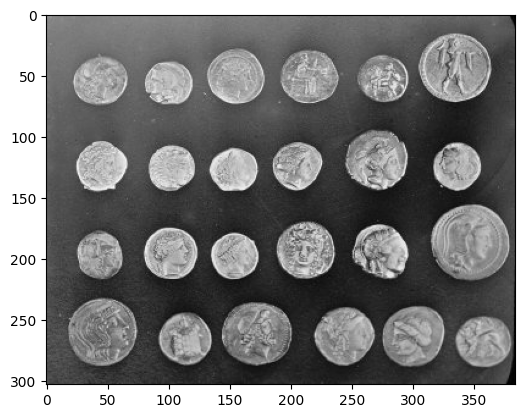

In [143]:
import skimage as sk
import numpy as np
import matplotlib.pyplot as plt

I = sk.data.coins()
plt.imshow(I ,cmap='gray')
print(I.size)
# I.dtype()
print("Range:", np.min(I), "to", np.max(I))

 2.Represent the histogram of the image. Explain the peaks of the histogram in terms of regions of the image.

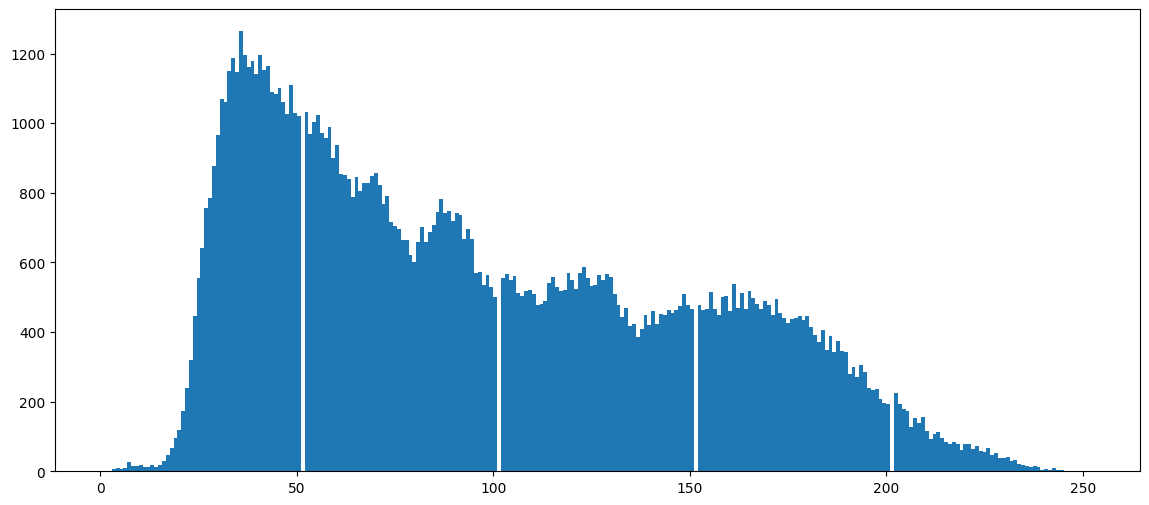

In [144]:
v = I.reshape(I.shape[0]*I.shape[1],1)

fig = plt.figure(figsize=(14, 6))
plt.hist(v, bins=256,density=False)
plt.show()

Comment: Each peak corresponds to a significant grouping of similar pixel values. Leftmost peak represents dark regions in the image (low-intensity values near 0).This peak i think corresponds to the darker background of the coins image. Rightmost peak represents bright regions in the image (high-intensity values near 255).Corresponding to the bright, reflective surfaces of the coins. Middle peaks represent regions with mid-range intensity values. I think it represent the shadows and edges around the coins.

3.Applied noise to the image and use the correct function to erase the noise.

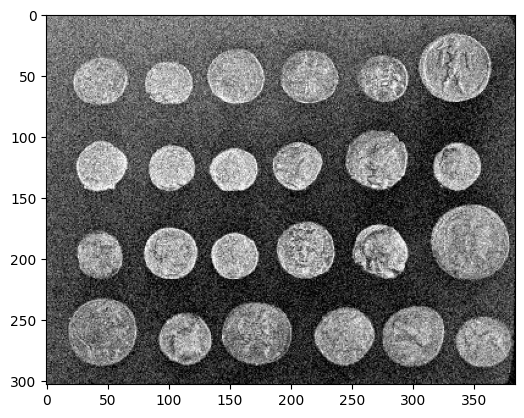

In [145]:
from skimage.util import random_noise

# Applied Gaussian noise

noisy_image = random_noise(I, mode='gaussian')
plt.imshow(noisy_image, cmap='gray')

In [146]:
from skimage.filters import gaussian

#Applied gaussian filter

filtered_image = gaussian(noisy_image, sigma=1)

Comment: As the sigma value increases, the image becomes blurrier, so the noise is reduced. But if the noise has a high intensity the sigma will have to increase a lot to eliminate the noise, but the image would not be distinguishable from what it is if we did something like that. So the edges become very smooth.

4.Segment the image using a k-means clustering algorithm with k=2 and represent the result

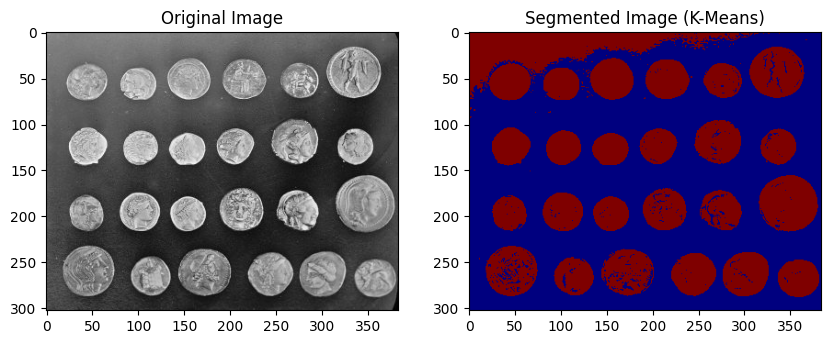

In [147]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0).fit(v)
segmented_image = kmeans.labels_.reshape(I.shape[:2])

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(I, cmap='gray')
axes[0].set_title('Original Image')
axes[1].imshow(segmented_image, cmap=plt.cm.jet)
axes[1].set_title('Segmented Image (K-Means)')
plt.show()

Comment: It leads to some areas of the table being incorrectly classified as part of the coin. It will give more accurate results if i increase the number of clusters.

5.Label the objects found in the image. Generate a figure with the original image and the labeled image. How many coins are there in the image?

there are 96 coins


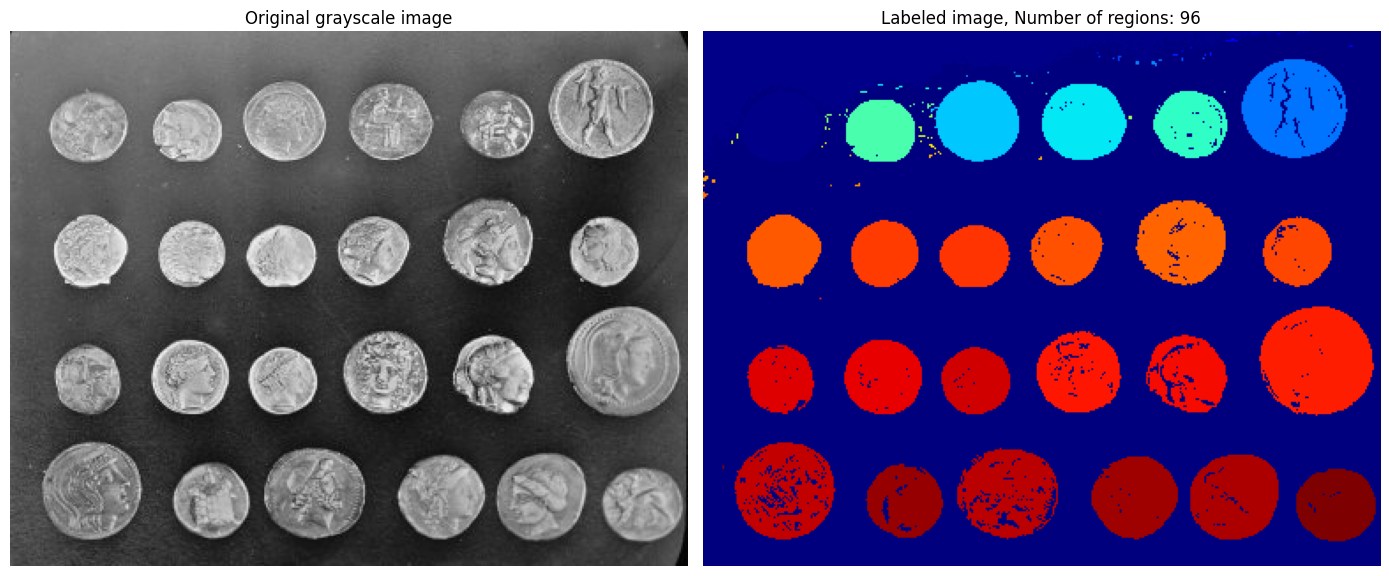

In [148]:
from skimage.filters import threshold_otsu
from skimage.measure import label
from skimage.color import label2rgb

label_image, nregions = label(segmented_image,return_num=True)  #ose ne vend te bw ver segmented image lart qe gjete
# image_label_overlay = label2rgb(label_image, image=I)

print('there are {} coins'.format(nregions))

fig, axes = plt.subplots(1,2,figsize=(14, 9))
ax = axes.ravel()
ax[0].imshow(I,cmap=plt.cm.gray)
ax[0].set_title('Original grayscale image')
ax[1].imshow(label_image,cmap=plt.cm.jet)
ax[1].set_title('Labeled image, Number of regions: {}'.format(nregions)) # set figure title
# ax[2].imshow(image_label_overlay,cmap=plt.cm.jet)
# ax[2].set_title('Segmented regions overlay')

ax[0].set_axis_off()
ax[1].set_axis_off()
# ax[2].set_axis_off()
plt.tight_layout()
plt.show()

6.Extract the area, major axis length and orientation of each coin. Report the average values of the extracted features. Represent a scatterplot of the area vs major axis length.

In [149]:
import pandas as pd
from skimage import measure

props = measure.regionprops_table(label_image,properties=['label','area','axis_major_length','orientation'])

df_features = pd.DataFrame(props)
# df_features.head()
print('Average value of area: {} '.format(df_features['area'].mean()))
print('Average value of axis_major_length: {} '.format(df_features['axis_major_length'].mean()))
print('Average value of orientation: {} '.format(df_features['orientation'].mean()))

Average value of area: 469.96875 
Average value of axis_major_length: 15.758363582402723 
Average value of orientation: -0.1608039190057604 


<Axes: xlabel='axis_major_length', ylabel='area'>

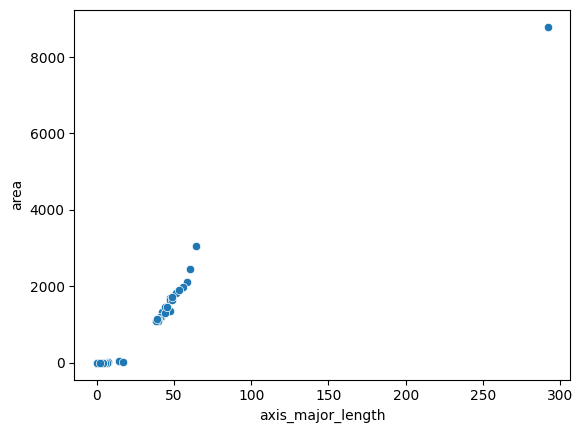

In [150]:
import seaborn as sns

sns.scatterplot(x='axis_major_length',y='area',data=df_features)

Comment: Clear correlation between coins's length and area can be observed

7.Using the labeled regions from the 'coins' image, how can I filter the regions to find those with an area greater than 1750 pixels, count how many such coins there are?

In [151]:
df_large_coins = df_features.loc[df_features['area']>1750]
N_large = df_large_coins.shape[0]
print('there are {} coins with an area larger than {}'.format(N_large,1750))

there are 7 coins with an area larger than 1750


8.Generate a 3-panel figure with the original image, the image with the little coins < 1750 coins (red color) and an image with the big coins > 1750 (blue color).

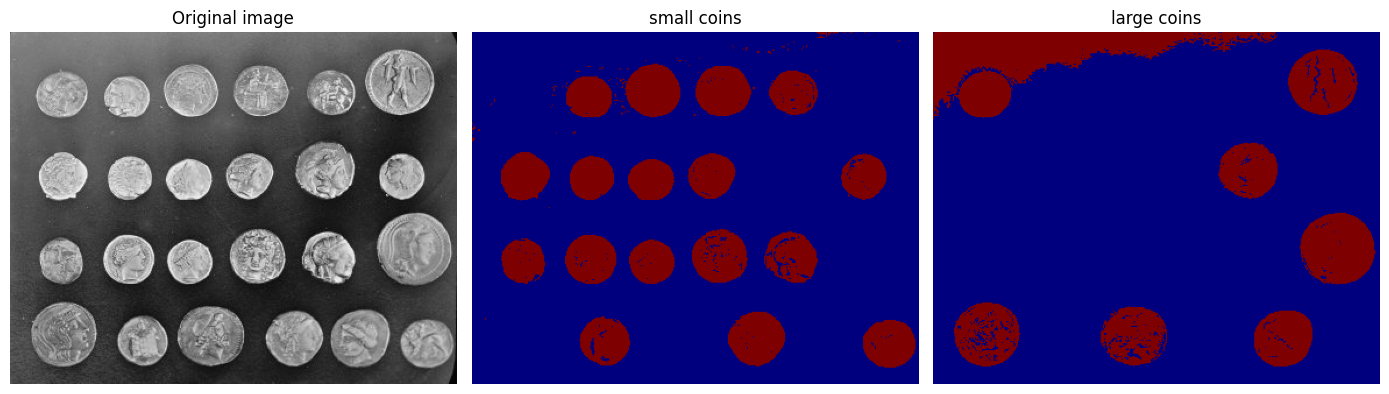

In [153]:
df_small_coins = df_features.loc[df_features['area']<1750]

labels_small = df_small_coins['label'].values
labels_large = df_large_coins['label'].values

mask_small_coins = np.isin(label_image,labels_small)
mask_large_coins = np.isin(label_image,labels_large)

fig, axes = plt.subplots(1,3,figsize=(14, 9))
ax = axes.ravel()
ax[0].imshow(I,cmap=plt.cm.gray)
ax[0].set_title('Original image')
ax[1].imshow(mask_small_coins,cmap=plt.cm.jet)
ax[1].set_title('small coins')
ax[2].imshow(mask_large_coins,cmap=plt.cm.jet)
ax[2].set_title('large coins')

ax[0].set_axis_off()
ax[1].set_axis_off()
ax[2].set_axis_off()
plt.tight_layout()
plt.show()

9.Describe the main steps required to perform segmentation of an RGB image using an unsupervised clustering algorithm (use other algorithms different than K-Means and compare the results)

Steps: Firstly we convert the 3D RGB image into a 2D array for clustering. Then we define the number of clusters that we will use. We then initialize the clustering method and fit the data (label for each pixel) and then we do the predictions. After Convert the 1D cluster labels back into a 2D segmentation map matching the original image dimensions.

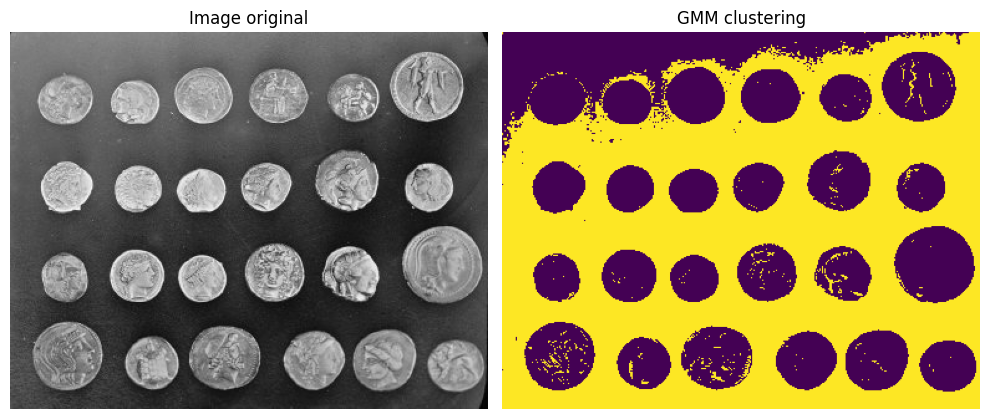

In [154]:
from sklearn import mixture
import matplotlib.pyplot as plt
from matplotlib import gridspec

gmm = mixture.GaussianMixture(n_components=2).fit(v)
v_gmm = gmm.fit_predict(v)
I_gmm = np.reshape(v_gmm,(I.shape[0],I.shape[1]))

fig = plt.figure(figsize=(10, 10))
gs = gridspec.GridSpec(2, 2)

ax0 = fig.add_subplot(gs[0,0])
ax0.imshow(I, cmap='gray')
ax0.set_title('Image original')
ax0.set_axis_off()

ax1 = fig.add_subplot(gs[0,1])
ax1.imshow(I_gmm)
ax1.set_title('GMM clustering')
ax1.set_axis_off()

plt.tight_layout()
plt.show()

Comment: The classification of both is very similar. Both make a misclassification of coins because they label with the same label a part of the coin with that of the table. And also the top part which is labeled the same by both as being a coin.

10.Extract the main texture features of this image

In [155]:
from skimage.feature.texture import graycomatrix, graycoprops

# image = np.array([[0, 0, 1, 1],[0, 0, 1, 1],[0, 2, 2, 2],[2, 2, 3, 3]], dtype=np.uint8)
# print(I.shape)
coins = (I / 255).astype(np.uint8)
g = graycomatrix(coins, [1], [0], levels=4, normed=False, symmetric=False)
print(I)
print('Number of times that a grayscale level zero has a neighbour with value zero at a distance of 1 pixel to the right (angle equal zero): {}'.format(g[0,0,0,0]))
print('Number of times that a grayscale level zero has a neighbour with value 1 at a distance of 1 pixel to the right (angle equal zero): {}'.format(g[0,1,0,0]))
print('Number of times that a grayscale level 2 has a neighbour with value 2 at a distance of 1 pixel to the right (angle equal zero): {}'.format(g[2,2,0,0]))
print('Number of times that a grayscale level 2 has a neighbour with value 0 at a distance of 1 pixel to the right (angle equal zero): {}'.format(g[2,0,0,0]))

[[ 47 123 133 ...  14   3  12]
 [ 93 144 145 ...  12   7   7]
 [126 147 143 ...   2  13   3]
 ...
 [ 81  79  74 ...   6   4   7]
 [ 88  82  74 ...   5   7   8]
 [ 91  79  68 ...   4  10   7]]
Number of times that a grayscale level zero has a neighbour with value zero at a distance of 1 pixel to the right (angle equal zero): 116049
Number of times that a grayscale level zero has a neighbour with value 1 at a distance of 1 pixel to the right (angle equal zero): 0
Number of times that a grayscale level 2 has a neighbour with value 2 at a distance of 1 pixel to the right (angle equal zero): 0
Number of times that a grayscale level 2 has a neighbour with value 0 at a distance of 1 pixel to the right (angle equal zero): 0


Once we have the GLCM we can compute the different texture properties.

In [158]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from skimage.feature.texture import graycomatrix, graycoprops
from skimage.measure import regionprops
from skimage import img_as_ubyte

props = regionprops(label_image, intensity_image=coins)
nregions = len(props)

props_texture = np.zeros((nregions, 5))
for i, p in enumerate(props):
    minr, minc, maxr, maxc = p.bbox
    I = coins[minr:maxr, minc:maxc]

    # Convertir a uint8 y escalar valores si es necesario
    Iu8 = img_as_ubyte(I)

    # Calcular GLCM
    g = graycomatrix(I, distances=[1], angles=[0], levels=256, normed=True, symmetric=True)

    # Extraer características
    props_texture[i, 0] = graycoprops(g, 'contrast')[0, 0]
    props_texture[i, 1] = graycoprops(g, 'dissimilarity')[0, 0]
    props_texture[i, 2] = graycoprops(g, 'homogeneity')[0, 0]
    props_texture[i, 3] = graycoprops(g, 'energy')[0, 0]
    props_texture[i, 4] = graycoprops(g, 'correlation')[0, 0]

# Exportar a Excel
df = pd.DataFrame(props_texture, columns=['Contrast', 'Dissimilarity', 'Homogeneity', 'Energy', 'Correlation'])
# df.to_excel("/content/drive/MyDrive/UT/TiranaCV2025/Texture_features.xlsx", index=False)
df

,Contrast,Dissimilarity,Homogeneity,Energy,Correlation
0,0.0,0.0,1.0,1.0,1.0
1,0.0,0.0,1.0,1.0,1.0
2,0.0,0.0,1.0,1.0,1.0
3,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
91,0.0,0.0,1.0,1.0,1.0
92,0.0,0.0,1.0,1.0,1.0
93,0.0,0.0,1.0,1.0,1.0
94,0.0,0.0,0.0,0.0,1.0


The contrast of the photo is not 0 and the other parameters are also not. I don't know what is wrong with the code. The image is black and white by itself.

Personal discussion: This course has been an incredibly enriching journey into the fascinating field of computer vision. From foundational concepts to advanced techniques, I’ve had the opportunity to explore a wide range of topics that have deepened my understanding and piqued my interest in this domain.
The hands-on exercises, such as image segmentation, feature extraction, and texture analysis, have allowed me to connect theoretical concepts with practical applications. These experiences have not only built my technical skills but also cultivated my ability to think critically about solving real-world problems using computer vision techniques.